### **1. Importing Libraries**

In [1]:
from numpy import argmax
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

### **2. Load Data**

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

### **3. Reducing the Training Data**

In [3]:
resample=10000
reduced_indices = np.random.choice(len(x_train), resample, replace=False)
x_new = x_train[reduced_indices]
y_new = y_train[reduced_indices]

print("Shape of Training Data :- ",x_new.shape)
print("Shape of Testing Data :- ",x_test.shape)
print("******************************")
print("Shape of Training Data Targets:- ",y_new.shape)
print("Shape of Testing Data Targets:- ",y_test.shape)


Shape of Training Data :-  (10000, 28, 28)
Shape of Testing Data :-  (10000, 28, 28)
******************************
Shape of Training Data Targets:-  (10000,)
Shape of Testing Data Targets:-  (10000,)


### **4. Viewing The Figures**

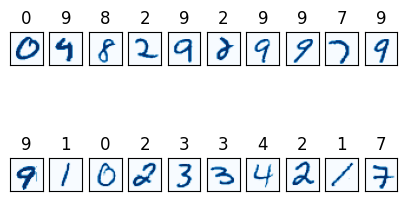

In [4]:
fig=plt.figure(figsize=(5,3))
for i in range(20):
    ax =fig.add_subplot(2,10,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_new[i]), cmap='Blues')
    ax.set_title(y_new[i])

### **5. Defining The Model**

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

### **6. Compiling The Model**

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

### **7. Early Stopping Callback**

In [7]:
early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

### **8. Fitting The Model**

In [16]:
history = model.fit(
    x_new, y_new,
    validation_data=(x_test, y_test),
    batch_size=len(x_new),
    epochs=150,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/150
1/1 [==============================] - 0s 163ms/step - loss: 0.7811 - accuracy: 0.8470 - val_loss: 0.5821 - val_accuracy: 0.8969
Epoch 2/150
1/1 [==============================] - 0s 64ms/step - loss: 0.7614 - accuracy: 0.8470 - val_loss: 0.5805 - val_accuracy: 0.8960
Epoch 3/150
1/1 [==============================] - 0s 63ms/step - loss: 0.7692 - accuracy: 0.8454 - val_loss: 0.5822 - val_accuracy: 0.8951
Epoch 4/150
1/1 [==============================] - 0s 60ms/step - loss: 0.7698 - accuracy: 0.8507 - val_loss: 0.5806 - val_accuracy: 0.8947
Epoch 5/150
1/1 [==============================] - 0s 103ms/step - loss: 0.7568 - accuracy: 0.8488 - val_loss: 0.5763 - val_accuracy: 0.8954
Epoch 6/150
1/1 [==============================] - 0s 64ms/step - loss: 0.7674 - accuracy: 0.8481 - val_loss: 0.5747 - val_accuracy: 0.8960
Epoch 7/150
1/1 [==============================] - 0s 64ms/step - loss: 0.7487 - accuracy: 0.8507 - val_loss: 0.5714 - val_accuracy: 0.8968
Epoch 8/150
1/1 [=

### **9. Plotting The Accuracy Graph**

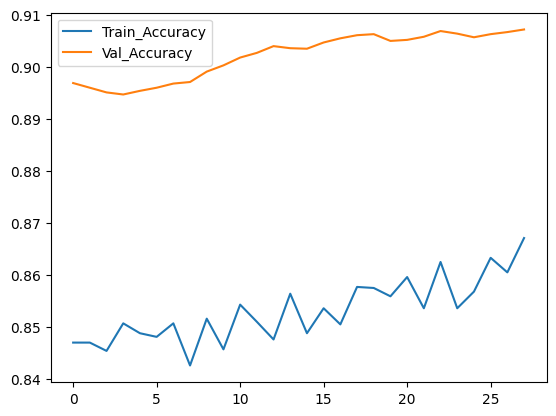

In [17]:
plt.plot(history.history["accuracy"], label = "Train_Accuracy")
plt.plot(history.history["val_accuracy"], label = "Val_Accuracy")
plt.legend()
plt.show()

### **10. Plotting The Loss Graph**

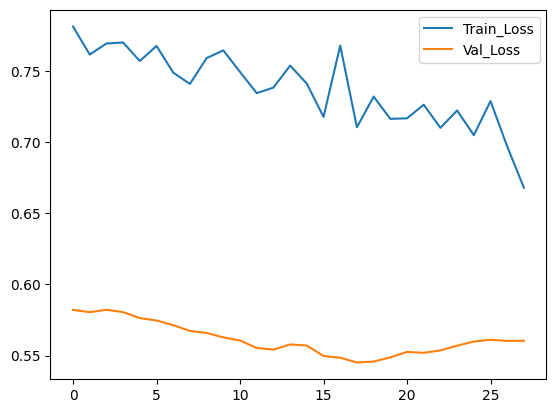

In [18]:
plt.plot(history.history["loss"], label = "Train_Loss")
plt.plot(history.history["val_loss"], label = "Val_Loss")
plt.legend()
plt.show()

### **11. Displaying The Input Image**

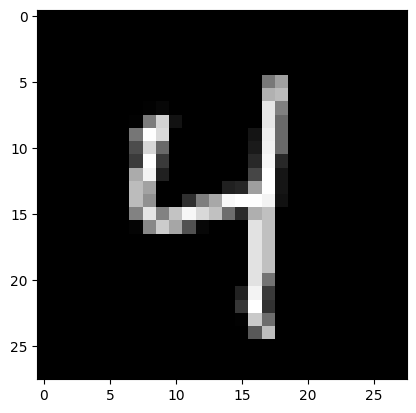

In [11]:
img = x_test[1080]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

### **12. Predicting The Result**

In [12]:
img= img.reshape(1,28,28)
p= model.predict([img])
print("Predicted Number is :- {}".format(argmax(p)))

1/1 [==============================] - 0s 77ms/step
Predicted Number is :- 4
